# 식물의 서식환경 공간 빅데이터 분석을 통한 ‘유용 식물 분포 가능성 예측지도’ 제작
#### _한남대 지질자원 빅데이터 연구팀(고성찬, 오현지, 최호경)

## Introduction
 * 앞서 진행하였던 MaxEnt 모델과 이번에 실시하는 파이썬을 이용한 로지스틱 회귀 머신러닝 모델링간의 비교를 통하여 식물의 서식 환경공간 예측 정확도를 높인다.  
 * 파이썬을 통한 작업은 크게 (1)모델링 데이터 전처리 및 특성 변환, (2)모델 학습 및 검증, (3)전체 분석지역에 대한 예측으로 나뉜다. 예측 결과는 asc파일로 저장하여 이후 지리정보 시스템 상에서 시각화를 하여 본다.  
 * 모델링 작업의 경우 "positive_종명"(생물위치자료를 기준으로 300m 반경 임의의 포인트 생성)와 "negative_종명"(예측 지역 내에서 임의의 포인트 생성)의 가설 데이터를 생성하여 학습한다.  
 * 이후 분석지역 전체에 해당하는 데이터를 불러오고 앞서 실시한 예측 모델을 적용하여 최종적으로 해당 식물의 서식 환경공간을 확인한다.

---

## 목차  
### 1. 주목(Taxus)
#### (1) 모델링 데이터 전처리 및 특성 변환
#### (2) 모델 학습 및 검증
#### (3) 분석지역 예측 
### 2. 마(Dioscorea)
#### (1) 모델링 데이터 전처리 및 특성 변환
#### (2) 모델 학습 및 검증
#### (3) 분석지역 예측 
### 3. 버드나무(Salix)
#### (1) 모델링 데이터 전처리 및 특성 변환
#### (2) 모델 학습 및 검증
#### (3) 분석지역 예측 
### 4. 은행나무(Ginkgo)
#### (1) 모델링 데이터 전처리 및 특성 변환
#### (2) 모델 학습 및 검증
#### (3) 분석지역 예측 


---

### 1. 주목(Taxus)
#### (1) 모델링 데이터 전처리 및 특성 변환

#### 분석 모듈 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import io
from skimage import io

#### 모델링 데이터 불러오기

In [2]:
# 미분포 가설 지역 데이터
t_negative = pd.read_csv("negative_Taxus.csv")
t_negative.head()

,class,temper_aver,prec_aver,soil_type,soil_structure,landform,corrosion_degree,Drainage_degree,soil_depth,LV2_CODE,lithoidx,FIFTH_FRTP,DMCLS,AGCLS,slope,dem
0,0,7.50000,111.58334,13.0,7.0,1.0,1.0,2.0,3.0,220.0,12.0,15.0,2.0,4.0,3.92967,849.34631
1,0,10.25833,103.91666,13.0,4.0,1.0,2.0,1.0,2.0,320.0,68.0,15.0,3.0,5.0,22.37656,371.40591
2,0,11.30000,104.75000,3.0,10.0,7.0,1.0,4.0,4.0,320.0,12.0,4.0,4.0,7.0,4.41594,109.06484
3,0,8.69167,109.41666,13.0,4.0,1.0,2.0,1.0,3.0,320.0,58.0,15.0,3.0,5.0,10.18564,672.65643
4,0,8.96667,108.91666,13.0,4.0,1.0,2.0,1.0,3.0,710.0,45.0,1.0,1.0,1.0,8.42481,519.95874


In [3]:
# 분포 가설 지역 데이터
t_positive = pd.read_csv("positive_Taxus.csv")
t_positive.head()

,class,temper_aver,prec_aver,soil_type,soil_structure,landform,corrosion_degree,Drainage_degree,soil_depth,LV2_CODE,lithoidx,FIFTH_FRTP,DMCLS,AGCLS,slope,dem
0,1,4.875,120.08334,13.0,3.0,1.0,1.0,1.0,2.0,330.0,47.0,6.0,3.0,5.0,18.31140,1430.38489
1,1,4.875,120.08334,13.0,3.0,1.0,1.0,1.0,2.0,310.0,47.0,6.0,4.0,7.0,18.24512,1425.54102
2,1,5.200,118.16666,13.0,3.0,1.0,1.0,1.0,2.0,310.0,47.0,6.0,4.0,7.0,20.75133,1436.79407
3,1,5.200,118.16666,13.0,3.0,1.0,1.0,1.0,2.0,310.0,47.0,6.0,4.0,7.0,15.95148,1437.73853
4,1,4.875,120.08334,13.0,3.0,1.0,1.0,1.0,2.0,330.0,47.0,6.0,3.0,5.0,18.31140,1430.38489


#### 데이터 정보 확인

In [4]:
t_negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   class             5000 non-null   int64  
 1   temper_aver       4997 non-null   float64
 2   prec_aver         4997 non-null   float64
 3   soil_type         4993 non-null   float64
 4   soil_structure    4993 non-null   float64
 5   landform          4993 non-null   float64
 6   corrosion_degree  4993 non-null   float64
 7   Drainage_degree   4993 non-null   float64
 8   soil_depth        4993 non-null   float64
 9   LV2_CODE          4994 non-null   float64
 10  lithoidx          4997 non-null   float64
 11  FIFTH_FRTP        4996 non-null   float64
 12  DMCLS             4996 non-null   float64
 13  AGCLS             4996 non-null   float64
 14  slope             4986 non-null   float64
 15  dem               4997 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 625

In [5]:
t_positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   class             5300 non-null   int64  
 1   temper_aver       5282 non-null   float64
 2   prec_aver         5282 non-null   float64
 3   soil_type         5286 non-null   float64
 4   soil_structure    5286 non-null   float64
 5   landform          5286 non-null   float64
 6   corrosion_degree  5286 non-null   float64
 7   Drainage_degree   5286 non-null   float64
 8   soil_depth        5286 non-null   float64
 9   LV2_CODE          5282 non-null   float64
 10  lithoidx          5282 non-null   float64
 11  FIFTH_FRTP        5282 non-null   float64
 12  DMCLS             5282 non-null   float64
 13  AGCLS             5282 non-null   float64
 14  slope             5234 non-null   float64
 15  dem               5282 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 662

#### 결측값 제거 및 두 데이터 병합
* Qgis를 통하여 랜덤으로 생성한 포인트들이 분석 대상 지역 경계면에 있게 될 경우, 그 데이터들은 데이터 정보를 가질 수 없게 되므로 결측값들을 제거한다.

In [6]:
t_negative_re = t_negative.dropna(axis=0)
t_negative_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4978 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   class             4978 non-null   int64  
 1   temper_aver       4978 non-null   float64
 2   prec_aver         4978 non-null   float64
 3   soil_type         4978 non-null   float64
 4   soil_structure    4978 non-null   float64
 5   landform          4978 non-null   float64
 6   corrosion_degree  4978 non-null   float64
 7   Drainage_degree   4978 non-null   float64
 8   soil_depth        4978 non-null   float64
 9   LV2_CODE          4978 non-null   float64
 10  lithoidx          4978 non-null   float64
 11  FIFTH_FRTP        4978 non-null   float64
 12  DMCLS             4978 non-null   float64
 13  AGCLS             4978 non-null   float64
 14  slope             4978 non-null   float64
 15  dem               4978 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 661

In [7]:
t_positive_re = t_positive.dropna(axis=0)
t_positive_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 0 to 5297
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   class             5234 non-null   int64  
 1   temper_aver       5234 non-null   float64
 2   prec_aver         5234 non-null   float64
 3   soil_type         5234 non-null   float64
 4   soil_structure    5234 non-null   float64
 5   landform          5234 non-null   float64
 6   corrosion_degree  5234 non-null   float64
 7   Drainage_degree   5234 non-null   float64
 8   soil_depth        5234 non-null   float64
 9   LV2_CODE          5234 non-null   float64
 10  lithoidx          5234 non-null   float64
 11  FIFTH_FRTP        5234 non-null   float64
 12  DMCLS             5234 non-null   float64
 13  AGCLS             5234 non-null   float64
 14  slope             5234 non-null   float64
 15  dem               5234 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 695

In [8]:
t_combined_data = pd.concat([t_negative_re, t_positive_re])
t_combined_data

,class,temper_aver,prec_aver,soil_type,soil_structure,landform,corrosion_degree,Drainage_degree,soil_depth,LV2_CODE,lithoidx,FIFTH_FRTP,DMCLS,AGCLS,slope,dem
0,0,7.50000,111.58334,13.0,7.0,1.0,1.0,2.0,3.0,220.0,12.0,15.0,2.0,4.0,3.92967,849.34631
1,0,10.25833,103.91666,13.0,4.0,1.0,2.0,1.0,2.0,320.0,68.0,15.0,3.0,5.0,22.37656,371.40591
2,0,11.30000,104.75000,3.0,10.0,7.0,1.0,4.0,4.0,320.0,12.0,4.0,4.0,7.0,4.41594,109.06484
3,0,8.69167,109.41666,13.0,4.0,1.0,2.0,1.0,3.0,320.0,58.0,15.0,3.0,5.0,10.18564,672.65643
4,0,8.96667,108.91666,13.0,4.0,1.0,2.0,1.0,3.0,710.0,45.0,1.0,1.0,1.0,8.42481,519.95874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,1,6.27500,119.41666,13.0,5.0,1.0,2.0,1.0,1.0,320.0,33.0,9.0,3.0,5.0,7.13371,1264.26196
5294,1,6.30000,119.50000,13.0,5.0,1.0,2.0,1.0,1.0,320.0,33.0,10.0,1.0,1.0,10.36167,1252.63416
5295,1,6.27500,119.41666,13.0,5.0,1.0,2.0,1.0,1.0,320.0,33.0,15.0,3.0,5.0,6.10427,1273.15173
5296,1,6.30000,119.50000,13.0,5.0,1.0,2.0,1.0,1.0,320.0,33.0,15.0,3.0,5.0,13.02105,1252.58337


In [9]:
t_combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10212 entries, 0 to 5297
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   class             10212 non-null  int64  
 1   temper_aver       10212 non-null  float64
 2   prec_aver         10212 non-null  float64
 3   soil_type         10212 non-null  float64
 4   soil_structure    10212 non-null  float64
 5   landform          10212 non-null  float64
 6   corrosion_degree  10212 non-null  float64
 7   Drainage_degree   10212 non-null  float64
 8   soil_depth        10212 non-null  float64
 9   LV2_CODE          10212 non-null  float64
 10  lithoidx          10212 non-null  float64
 11  FIFTH_FRTP        10212 non-null  float64
 12  DMCLS             10212 non-null  float64
 13  AGCLS             10212 non-null  float64
 14  slope             10212 non-null  float64
 15  dem               10212 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 1.

#### 연속형 변수에 대한 정규분포화
* 연속형 변수인 고도(dem), 경사(slope), 연평균 기온(temper_aver), 연평균 강수량(prec_aver)에 대해서 log를 사용하여 정규분포화 시켜준다.

In [10]:
t_data_copy = t_combined_data.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B2DC8AA00>,
      dtype=object)

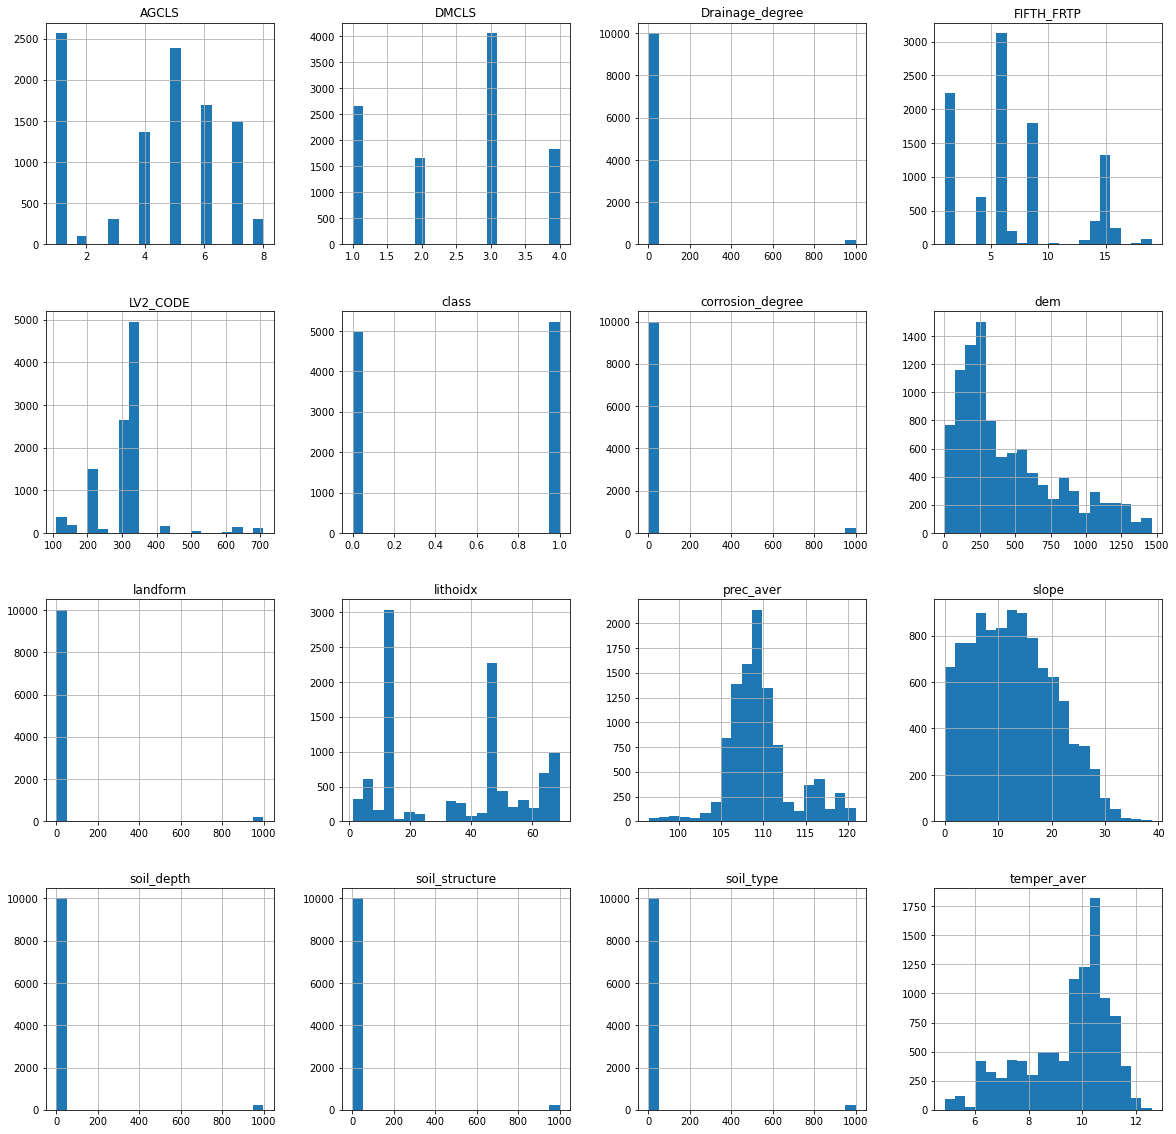

In [11]:
t_data_copy.hist(bins=20, figsize= (20, 20))

In [12]:
skew_col = ['dem', 'slope', 'temper_aver', 'prec_aver']
for c in skew_col:
    t_data_copy[c] = np.log1p(t_data_copy[c].values)
    
print(t_data_copy)

      class  temper_aver  prec_aver  soil_type  soil_structure  landform  \
0         0     2.140066   4.723694       13.0             7.0       1.0   
1         0     2.421108   4.653166       13.0             4.0       1.0   
2         0     2.509599   4.661078        3.0            10.0       7.0   
3         0     2.271267   4.704261       13.0             4.0       1.0   
4         0     2.299247   4.699722       13.0             4.0       1.0   
...     ...          ...        ...        ...             ...       ...   
5293      1     1.984444   4.790958       13.0             5.0       1.0   
5294      1     1.987874   4.791650       13.0             5.0       1.0   
5295      1     1.984444   4.790958       13.0             5.0       1.0   
5296      1     1.987874   4.791650       13.0             5.0       1.0   
5297      1     1.987874   4.791650       13.0             5.0       1.0   

      corrosion_degree  Drainage_degree  soil_depth  LV2_CODE  lithoidx  \
0           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B2ED00F40>,
      dtype=object)

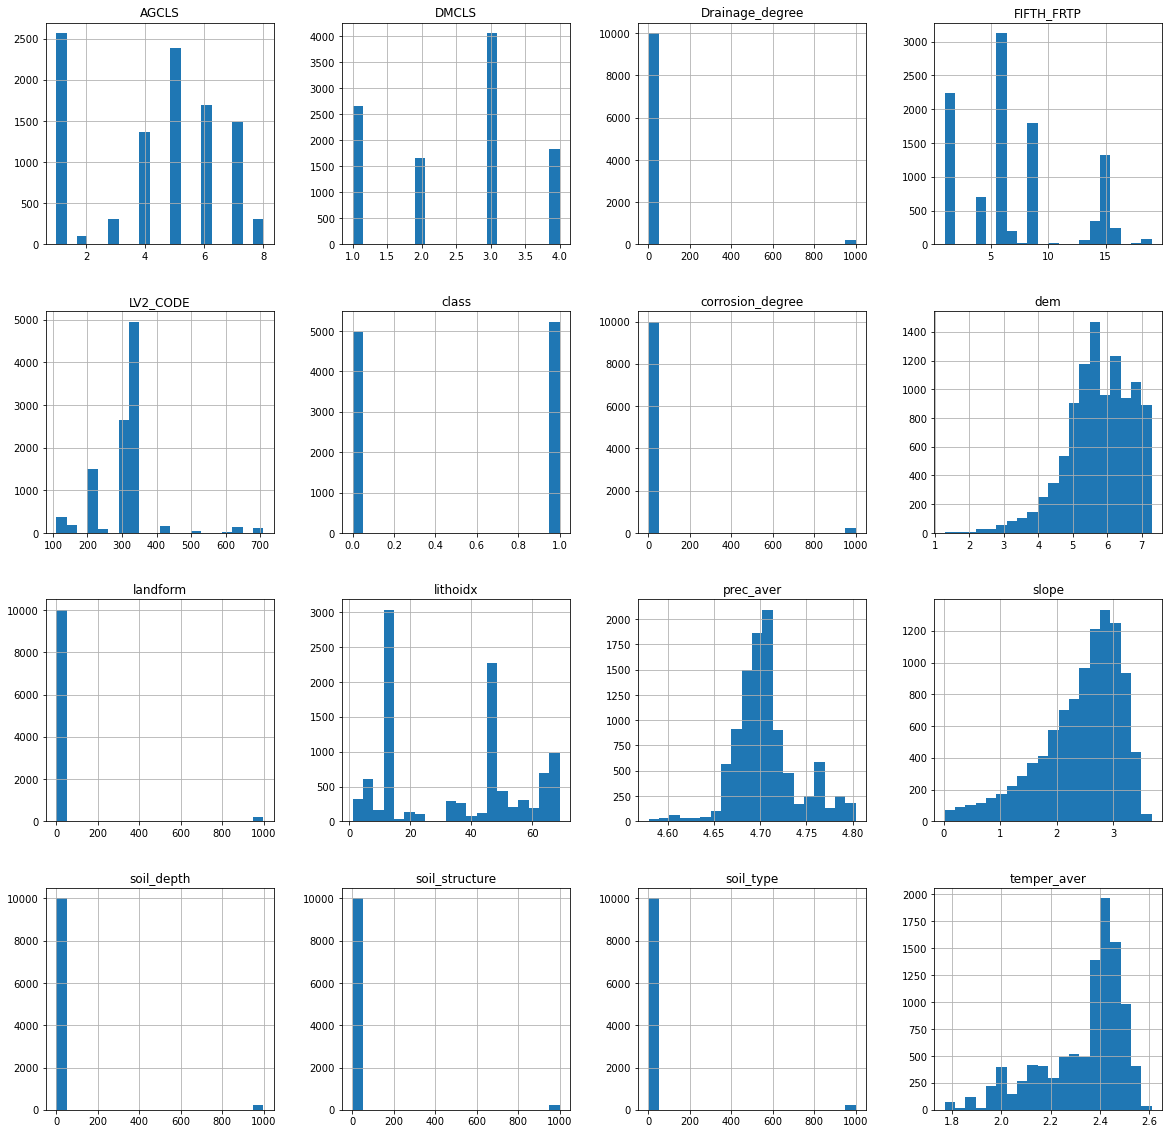

In [13]:
t_data_copy.hist(bins=20, figsize= (20, 20))

#### 범주형 변수에 대한 dummy 변수 생성
* 연속형 변수 이외의 모든 변수들은 범주형 변수로 one-hot-encoding을 통한 더미 변수를 생성한다.

In [14]:
t_data_copy['FIFTH_FRTP'] = t_data_copy['FIFTH_FRTP'].astype('str')
t_data_copy['AGCLS'] = t_data_copy['AGCLS'].astype('str')
t_data_copy['DMCLS'] = t_data_copy['DMCLS'].astype('str')
t_data_copy['lithoidx'] = t_data_copy['lithoidx'].astype('str')
t_data_copy['LV2_CODE'] = t_data_copy['LV2_CODE'].astype('str')
t_data_copy['soil_depth'] = t_data_copy['soil_depth'].astype('str')
t_data_copy['Drainage_degree'] = t_data_copy['Drainage_degree'].astype('str')
t_data_copy['corrosion_degree'] = t_data_copy['corrosion_degree'].astype('str')
t_data_copy['landform'] = t_data_copy['landform'].astype('str')
t_data_copy['soil_structure'] = t_data_copy['soil_structure'].astype('str')
t_data_copy['soil_type'] = t_data_copy['soil_type'].astype('str')

In [15]:
t_dummy_data = t_data_copy[['FIFTH_FRTP', 'AGCLS', 'DMCLS', 'lithoidx', 'LV2_CODE', 
                        'soil_depth', 'Drainage_degree', 'corrosion_degree', 'landform', 'soil_structure', 'soil_type']]
t_dummy_col=pd.get_dummies(t_dummy_data)

In [16]:
t_dummy_col

,FIFTH_FRTP_1.0,FIFTH_FRTP_10.0,FIFTH_FRTP_11.0,FIFTH_FRTP_12.0,FIFTH_FRTP_13.0,FIFTH_FRTP_14.0,FIFTH_FRTP_15.0,FIFTH_FRTP_16.0,FIFTH_FRTP_18.0,FIFTH_FRTP_19.0,...,soil_type_11.0,soil_type_13.0,soil_type_2.0,soil_type_3.0,soil_type_4.0,soil_type_5.0,soil_type_7.0,soil_type_8.0,soil_type_9.0,soil_type_999.0
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5294,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5295,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5296,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### 기존 데이터 프레임과 더미 변수화한 데이터 프레임 결합 및 기존 범주형 변수들의 삭제

In [17]:
t_data_dummy = pd.concat([t_data_copy, t_dummy_col], axis=1)
t_data_dummy

,class,temper_aver,prec_aver,soil_type,soil_structure,landform,corrosion_degree,Drainage_degree,soil_depth,LV2_CODE,...,soil_type_11.0,soil_type_13.0,soil_type_2.0,soil_type_3.0,soil_type_4.0,soil_type_5.0,soil_type_7.0,soil_type_8.0,soil_type_9.0,soil_type_999.0
0,0,2.140066,4.723694,13.0,7.0,1.0,1.0,2.0,3.0,220.0,...,0,1,0,0,0,0,0,0,0,0
1,0,2.421108,4.653166,13.0,4.0,1.0,2.0,1.0,2.0,320.0,...,0,1,0,0,0,0,0,0,0,0
2,0,2.509599,4.661078,3.0,10.0,7.0,1.0,4.0,4.0,320.0,...,0,0,0,1,0,0,0,0,0,0
3,0,2.271267,4.704261,13.0,4.0,1.0,2.0,1.0,3.0,320.0,...,0,1,0,0,0,0,0,0,0,0
4,0,2.299247,4.699722,13.0,4.0,1.0,2.0,1.0,3.0,710.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,1,1.984444,4.790958,13.0,5.0,1.0,2.0,1.0,1.0,320.0,...,0,1,0,0,0,0,0,0,0,0
5294,1,1.987874,4.791650,13.0,5.0,1.0,2.0,1.0,1.0,320.0,...,0,1,0,0,0,0,0,0,0,0
5295,1,1.984444,4.790958,13.0,5.0,1.0,2.0,1.0,1.0,320.0,...,0,1,0,0,0,0,0,0,0,0
5296,1,1.987874,4.791650,13.0,5.0,1.0,2.0,1.0,1.0,320.0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
t_data_dummy = t_data_dummy.drop(['FIFTH_FRTP', 'AGCLS', 'DMCLS', 'lithoidx', 'LV2_CODE', 
                        'soil_depth', 'Drainage_degree', 'corrosion_degree', 'landform', 'soil_structure', 'soil_type'], axis=1)

In [19]:
t_data_dummy

,class,temper_aver,prec_aver,slope,dem,FIFTH_FRTP_1.0,FIFTH_FRTP_10.0,FIFTH_FRTP_11.0,FIFTH_FRTP_12.0,FIFTH_FRTP_13.0,...,soil_type_11.0,soil_type_13.0,soil_type_2.0,soil_type_3.0,soil_type_4.0,soil_type_5.0,soil_type_7.0,soil_type_8.0,soil_type_9.0,soil_type_999.0
0,0,2.140066,4.723694,1.595272,6.745644,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,2.421108,4.653166,3.151734,5.919984,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2.509599,4.661078,1.689346,4.701070,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,2.271267,4.704261,2.414631,6.512720,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,2.299247,4.699722,2.243346,6.255671,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,1,1.984444,4.790958,2.096017,7.143034,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5294,1,1.987874,4.791650,2.430245,7.133802,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5295,1,1.984444,4.790958,1.960696,7.150036,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5296,1,1.987874,4.791650,2.640560,7.133761,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


---

#### (2) 모델 학습 및 검증
#### 훈련 데이터와 테스트 데이터로 나눈 후 LogisticRegression 모델 학습

In [20]:
X = t_data_dummy.drop('class', axis=1)
y = t_data_dummy['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Ko\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 테스트 데이터에 대한 예측 및 정확도 산출

In [22]:
t_pred = logreg.predict(X_test)
t_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test, t_pred)))

예측 정확도: 0.7889


#### 오차 행렬(confusion matrix)

In [24]:
from sklearn import metrics
t_cnf_matrix = metrics.confusion_matrix(y_test, t_pred)
t_cnf_matrix

array([[ 881,  354],
       [ 185, 1133]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

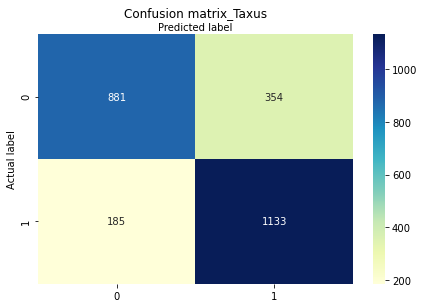

In [25]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(t_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix_Taxus', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### 정확도(Accuracy), 정밀도(Precision), 재현율(Recall)

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, t_pred))
print("Precision:",metrics.precision_score(y_test, t_pred))
print("Recall:",metrics.recall_score(y_test, t_pred))

Accuracy: 0.7888758323540932
Precision: 0.7619367854741089
Recall: 0.8596358118361154


#### ROC-AUC Score

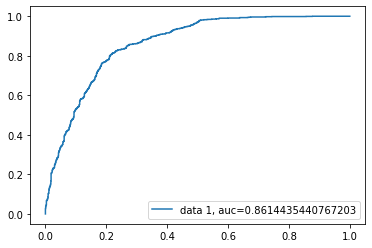

In [27]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

---

#### (3) 분석지역 예측 
#### 분석지역 데이터 불러오기 및 데이터프레임화
* 불러올 데이터들은 15개의 환경변수 데이터들로 모두 래스터 형식의 tif파일이다. 래스터 형식의 경우 하나의 픽셀(90x90)마다 각각 해당 지역 데이터 정보를 담고 있다. 따라서 불러온 데이터들을 reshape 작업을 통해 모델링 작업에서 사용한 데이터 프레임과 동일한 형태로 바꿔준다.

In [28]:
dem_1 = pd.DataFrame(io.imread('dem_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
slope_1 = pd.DataFrame(io.imread('slope_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
FIFTH_1 = pd.DataFrame(io.imread('FIFTH_FRTP_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
AGCLS_1 = pd.DataFrame(io.imread('AGCLS_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
DMCLS_1 = pd.DataFrame(io.imread('DMCLS_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
lithoidx_1 = pd.DataFrame(io.imread('lithoidx_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
LV2_CODE_1 = pd.DataFrame(io.imread('LV2_CODE_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
soil_depth_1 = pd.DataFrame(io.imread('soil_depth_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
Drainage_degree_1 = pd.DataFrame(io.imread('Drainage_degree_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
corrosion_degree_1 = pd.DataFrame(io.imread('corrosion_degree_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
landform_1 = pd.DataFrame(io.imread('landform_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
soil_structure_1 = pd.DataFrame(io.imread('soil_structure_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
soil_type_1 = pd.DataFrame(io.imread('soil_type_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
temper_aver_1 = pd.DataFrame(io.imread('temper_aver_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
prec_aver_1 = pd.DataFrame(io.imread('prec_aver_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)

In [29]:
dic1 = {'dem': dem_1, 
        'slope': slope_1, 
        'FIFTH_FRTP': FIFTH_1, 
        'AGCLS': AGCLS_1, 
        'DMCLS': DMCLS_1, 
        'lithoidx': lithoidx_1, 
        'LV2_CODE': LV2_CODE_1, 
        'soil_depth': soil_depth_1, 
        'Drainage_degree': Drainage_degree_1, 
        'corrosion_degree': corrosion_degree_1, 
        'landform': landform_1, 
        'soil_structure': soil_structure_1, 
        'soil_type': soil_type_1, 
        'temper_aver': temper_aver_1, 
        'prec_aver': prec_aver_1}

In [30]:
plant_df = pd.DataFrame(dic1)
plant_df.head(10)

,dem,slope,FIFTH_FRTP,AGCLS,DMCLS,lithoidx,LV2_CODE,soil_depth,Drainage_degree,corrosion_degree,landform,soil_structure,soil_type,temper_aver,prec_aver
0,366.907867,5.552487,6.0,6.0,3.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,9.775000,109.333336
1,357.333649,12.183459,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,9.775000,109.333336
2,332.507141,16.212358,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,9.775000,109.333336
3,332.507141,16.212358,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,9.775000,109.333336
4,285.804565,10.131753,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,9.775000,109.333336
5,271.076019,9.466756,15.0,3.0,2.0,47.0,0.0,2.0,2.0,1.0,3.0,1.0,9.0,9.775000,109.333336
6,258.036346,9.663770,15.0,3.0,2.0,47.0,0.0,2.0,2.0,1.0,3.0,1.0,9.0,9.775000,109.333336
7,244.728958,8.387999,15.0,3.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,9.775000,109.333336
8,234.280334,3.636358,1.0,1.0,1.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,9.700001,109.583336
9,233.923965,6.209974,14.0,4.0,2.0,47.0,0.0,2.0,1.0,2.0,1.0,4.0,13.0,9.700001,109.583336


In [31]:
region_data_copy = plant_df.copy()

region_skew_col = ['dem', 'slope', 'temper_aver', 'prec_aver']
for c in region_skew_col:
    region_data_copy[c] = np.log1p(region_data_copy[c].values)
    
region_data_copy

,dem,slope,FIFTH_FRTP,AGCLS,DMCLS,lithoidx,LV2_CODE,soil_depth,Drainage_degree,corrosion_degree,landform,soil_structure,soil_type,temper_aver,prec_aver
0,5.907833,1.879845,6.0,6.0,3.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,2.377229,4.703506
1,5.881465,2.578963,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,2.377229,4.703506
2,5.809664,2.845628,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,2.377229,4.703506
3,5.809664,2.845628,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,2.377229,4.703506
4,5.658801,2.409802,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,2.377229,4.703506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339773,5.570938,3.236597,9.0,6.0,3.0,29.0,330.0,2.0,1.0,2.0,1.0,4.0,13.0,2.441622,4.598481
2339774,5.614907,3.102898,9.0,6.0,3.0,29.0,330.0,2.0,1.0,2.0,1.0,4.0,13.0,2.441622,4.598481
2339775,5.614907,3.102898,9.0,6.0,3.0,29.0,330.0,2.0,1.0,2.0,1.0,4.0,13.0,2.424065,4.610987
2339776,5.732431,3.264980,9.0,6.0,3.0,29.0,330.0,3.0,1.0,2.0,1.0,7.0,13.0,2.424065,4.610987


In [32]:
region_data_copy['FIFTH_FRTP'] = region_data_copy['FIFTH_FRTP'].astype('str')
region_data_copy['AGCLS'] = region_data_copy['AGCLS'].astype('str')
region_data_copy['DMCLS'] = region_data_copy['DMCLS'].astype('str')
region_data_copy['lithoidx'] = region_data_copy['lithoidx'].astype('str')
region_data_copy['LV2_CODE'] = region_data_copy['LV2_CODE'].astype('str')
region_data_copy['soil_depth'] = region_data_copy['soil_depth'].astype('str')
region_data_copy['Drainage_degree'] = region_data_copy['Drainage_degree'].astype('str')
region_data_copy['corrosion_degree'] = region_data_copy['corrosion_degree'].astype('str')
region_data_copy['landform'] = region_data_copy['landform'].astype('str')
region_data_copy['soil_structure'] = region_data_copy['soil_structure'].astype('str')
region_data_copy['soil_type'] = region_data_copy['soil_type'].astype('str')

In [33]:
region_dummy_data = region_data_copy[['FIFTH_FRTP', 'AGCLS', 'DMCLS', 'lithoidx', 'LV2_CODE', 
                        'soil_depth', 'Drainage_degree', 'corrosion_degree', 'landform', 'soil_structure', 'soil_type']]
region_dummy_col=pd.get_dummies(region_dummy_data)

In [34]:
region_dummy_col.head()

,FIFTH_FRTP_0.0,FIFTH_FRTP_1.0,FIFTH_FRTP_10.0,FIFTH_FRTP_11.0,FIFTH_FRTP_12.0,FIFTH_FRTP_13.0,FIFTH_FRTP_14.0,FIFTH_FRTP_15.0,FIFTH_FRTP_16.0,FIFTH_FRTP_17.0,...,soil_type_11.0,soil_type_13.0,soil_type_2.0,soil_type_3.0,soil_type_4.0,soil_type_5.0,soil_type_7.0,soil_type_8.0,soil_type_9.0,soil_type_999.0
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### t_dummy_col과 region_dummy_col의 columns 값들 비교 및 기존 모델링 재학습
* 기존 모델링에서 사용한 t_dummy_col의 경우 포인트들의 위치 값에 따라 변수들을 맵핑하였기 때문에 전체 분석대상 지역의 region_dummy_col과 비교했을 때 없는 feature들이 있게 된다. 따라서 기존 t_dummy_col에 없는 feature들을 0값으로 맵핑하여 추가하여 준 후 재학습을 시켜준다 

In [35]:
#t_dummy_col과 region_dummy_col의 columns 비교
print(t_dummy_col.columns)
print('-'*50)
print(region_dummy_col.columns)

Index(['FIFTH_FRTP_1.0', 'FIFTH_FRTP_10.0', 'FIFTH_FRTP_11.0',
       'FIFTH_FRTP_12.0', 'FIFTH_FRTP_13.0', 'FIFTH_FRTP_14.0',
       'FIFTH_FRTP_15.0', 'FIFTH_FRTP_16.0', 'FIFTH_FRTP_18.0',
       'FIFTH_FRTP_19.0',
       ...
       'soil_type_11.0', 'soil_type_13.0', 'soil_type_2.0', 'soil_type_3.0',
       'soil_type_4.0', 'soil_type_5.0', 'soil_type_7.0', 'soil_type_8.0',
       'soil_type_9.0', 'soil_type_999.0'],
      dtype='object', length=166)
--------------------------------------------------
Index(['FIFTH_FRTP_0.0', 'FIFTH_FRTP_1.0', 'FIFTH_FRTP_10.0',
       'FIFTH_FRTP_11.0', 'FIFTH_FRTP_12.0', 'FIFTH_FRTP_13.0',
       'FIFTH_FRTP_14.0', 'FIFTH_FRTP_15.0', 'FIFTH_FRTP_16.0',
       'FIFTH_FRTP_17.0',
       ...
       'soil_type_11.0', 'soil_type_13.0', 'soil_type_2.0', 'soil_type_3.0',
       'soil_type_4.0', 'soil_type_5.0', 'soil_type_7.0', 'soil_type_8.0',
       'soil_type_9.0', 'soil_type_999.0'],
      dtype='object', length=189)


In [36]:
#t_dummy_col과 region_dummy_col columns의 교집합
t_gyo_dummy_col = set(t_dummy_col.columns) & set(region_dummy_col.columns)
t_gyo_dummy_col

{'AGCLS_1.0',
 'AGCLS_2.0',
 'AGCLS_3.0',
 'AGCLS_4.0',
 'AGCLS_5.0',
 'AGCLS_6.0',
 'AGCLS_7.0',
 'AGCLS_8.0',
 'DMCLS_1.0',
 'DMCLS_2.0',
 'DMCLS_3.0',
 'DMCLS_4.0',
 'Drainage_degree_1.0',
 'Drainage_degree_2.0',
 'Drainage_degree_3.0',
 'Drainage_degree_4.0',
 'Drainage_degree_5.0',
 'Drainage_degree_6.0',
 'Drainage_degree_999.0',
 'FIFTH_FRTP_1.0',
 'FIFTH_FRTP_10.0',
 'FIFTH_FRTP_11.0',
 'FIFTH_FRTP_12.0',
 'FIFTH_FRTP_13.0',
 'FIFTH_FRTP_14.0',
 'FIFTH_FRTP_15.0',
 'FIFTH_FRTP_16.0',
 'FIFTH_FRTP_18.0',
 'FIFTH_FRTP_19.0',
 'FIFTH_FRTP_3.0',
 'FIFTH_FRTP_4.0',
 'FIFTH_FRTP_6.0',
 'FIFTH_FRTP_7.0',
 'FIFTH_FRTP_8.0',
 'FIFTH_FRTP_9.0',
 'LV2_CODE_110.0',
 'LV2_CODE_120.0',
 'LV2_CODE_130.0',
 'LV2_CODE_140.0',
 'LV2_CODE_150.0',
 'LV2_CODE_160.0',
 'LV2_CODE_210.0',
 'LV2_CODE_220.0',
 'LV2_CODE_230.0',
 'LV2_CODE_240.0',
 'LV2_CODE_250.0',
 'LV2_CODE_310.0',
 'LV2_CODE_320.0',
 'LV2_CODE_330.0',
 'LV2_CODE_410.0',
 'LV2_CODE_420.0',
 'LV2_CODE_430.0',
 'LV2_CODE_510.0',
 'LV2_C

In [37]:
#region_dummy_col에서 교집합 요소를 빼서 t_dummy_col에 없는 컬럼을 확인
t_uniq_col = set(region_dummy_col) - t_gyo_dummy_col
t_uniq_col

{'AGCLS_0.0',
 'AGCLS_10.0',
 'AGCLS_9.0',
 'DMCLS_0.0',
 'Drainage_degree_0.0',
 'FIFTH_FRTP_0.0',
 'FIFTH_FRTP_17.0',
 'FIFTH_FRTP_2.0',
 'FIFTH_FRTP_20.0',
 'FIFTH_FRTP_5.0',
 'LV2_CODE_0.0',
 'LV2_CODE_520.0',
 'LV2_CODE_720.0',
 'corrosion_degree_0.0',
 'landform_0.0',
 'lithoidx_0.0',
 'lithoidx_21.0',
 'lithoidx_31.0',
 'lithoidx_57.0',
 'lithoidx_61.0',
 'soil_depth_0.0',
 'soil_structure_0.0',
 'soil_type_0.0'}

In [38]:
#t_uniq_col의 리스트화
t_list_uniq_col = list(t_uniq_col)

In [39]:
#list_uniq_col의 dummy_col에 추가
for t_unique in t_list_uniq_col:
    t_dummy_col[t_unique] = 0
    
t_dummy_col

,FIFTH_FRTP_1.0,FIFTH_FRTP_10.0,FIFTH_FRTP_11.0,FIFTH_FRTP_12.0,FIFTH_FRTP_13.0,FIFTH_FRTP_14.0,FIFTH_FRTP_15.0,FIFTH_FRTP_16.0,FIFTH_FRTP_18.0,FIFTH_FRTP_19.0,...,lithoidx_61.0,lithoidx_0.0,lithoidx_57.0,LV2_CODE_520.0,LV2_CODE_0.0,DMCLS_0.0,Drainage_degree_0.0,soil_structure_0.0,FIFTH_FRTP_2.0,FIFTH_FRTP_20.0
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5294,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5295,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5296,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#달라진 dummy_col을 적용한 재학습
t_data_dummy = pd.concat([t_data_copy, t_dummy_col], axis=1)
t_data_dummy

,class,temper_aver,prec_aver,soil_type,soil_structure,landform,corrosion_degree,Drainage_degree,soil_depth,LV2_CODE,...,lithoidx_61.0,lithoidx_0.0,lithoidx_57.0,LV2_CODE_520.0,LV2_CODE_0.0,DMCLS_0.0,Drainage_degree_0.0,soil_structure_0.0,FIFTH_FRTP_2.0,FIFTH_FRTP_20.0
0,0,2.140066,4.723694,13.0,7.0,1.0,1.0,2.0,3.0,220.0,...,0,0,0,0,0,0,0,0,0,0
1,0,2.421108,4.653166,13.0,4.0,1.0,2.0,1.0,2.0,320.0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.509599,4.661078,3.0,10.0,7.0,1.0,4.0,4.0,320.0,...,0,0,0,0,0,0,0,0,0,0
3,0,2.271267,4.704261,13.0,4.0,1.0,2.0,1.0,3.0,320.0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.299247,4.699722,13.0,4.0,1.0,2.0,1.0,3.0,710.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,1,1.984444,4.790958,13.0,5.0,1.0,2.0,1.0,1.0,320.0,...,0,0,0,0,0,0,0,0,0,0
5294,1,1.987874,4.791650,13.0,5.0,1.0,2.0,1.0,1.0,320.0,...,0,0,0,0,0,0,0,0,0,0
5295,1,1.984444,4.790958,13.0,5.0,1.0,2.0,1.0,1.0,320.0,...,0,0,0,0,0,0,0,0,0,0
5296,1,1.987874,4.791650,13.0,5.0,1.0,2.0,1.0,1.0,320.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
t_data_dummy = t_data_dummy.drop(['FIFTH_FRTP', 'AGCLS', 'DMCLS', 'lithoidx', 'LV2_CODE', 
                        'soil_depth', 'Drainage_degree', 'corrosion_degree', 'landform', 'soil_structure', 'soil_type'], axis=1)
t_data_dummy

,class,temper_aver,prec_aver,slope,dem,FIFTH_FRTP_1.0,FIFTH_FRTP_10.0,FIFTH_FRTP_11.0,FIFTH_FRTP_12.0,FIFTH_FRTP_13.0,...,lithoidx_61.0,lithoidx_0.0,lithoidx_57.0,LV2_CODE_520.0,LV2_CODE_0.0,DMCLS_0.0,Drainage_degree_0.0,soil_structure_0.0,FIFTH_FRTP_2.0,FIFTH_FRTP_20.0
0,0,2.140066,4.723694,1.595272,6.745644,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2.421108,4.653166,3.151734,5.919984,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.509599,4.661078,1.689346,4.701070,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2.271267,4.704261,2.414631,6.512720,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.299247,4.699722,2.243346,6.255671,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,1,1.984444,4.790958,2.096017,7.143034,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5294,1,1.987874,4.791650,2.430245,7.133802,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5295,1,1.984444,4.790958,1.960696,7.150036,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5296,1,1.987874,4.791650,2.640560,7.133761,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#재학습
X = t_data_dummy.drop('class', axis=1)
y = t_data_dummy['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Ko\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 분석대상 지역 예측 및 결과값 저장

In [44]:
region_data_dummy = pd.concat([region_data_copy, region_dummy_col], axis=1)
region_data_dummy

,dem,slope,FIFTH_FRTP,AGCLS,DMCLS,lithoidx,LV2_CODE,soil_depth,Drainage_degree,corrosion_degree,...,soil_type_11.0,soil_type_13.0,soil_type_2.0,soil_type_3.0,soil_type_4.0,soil_type_5.0,soil_type_7.0,soil_type_8.0,soil_type_9.0,soil_type_999.0
0,5.907833,1.879845,6.0,6.0,3.0,47.0,0.0,3.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,0
1,5.881465,2.578963,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,0
2,5.809664,2.845628,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,0
3,5.809664,2.845628,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,0
4,5.658801,2.409802,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339773,5.570938,3.236597,9.0,6.0,3.0,29.0,330.0,2.0,1.0,2.0,...,0,1,0,0,0,0,0,0,0,0
2339774,5.614907,3.102898,9.0,6.0,3.0,29.0,330.0,2.0,1.0,2.0,...,0,1,0,0,0,0,0,0,0,0
2339775,5.614907,3.102898,9.0,6.0,3.0,29.0,330.0,2.0,1.0,2.0,...,0,1,0,0,0,0,0,0,0,0
2339776,5.732431,3.264980,9.0,6.0,3.0,29.0,330.0,3.0,1.0,2.0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
region_data_dummy = region_data_dummy.drop(['FIFTH_FRTP', 'AGCLS', 'DMCLS', 'lithoidx', 'LV2_CODE', 
                        'soil_depth', 'Drainage_degree', 'corrosion_degree', 'landform', 'soil_structure', 'soil_type'], axis=1)

In [46]:
region_data_dummy

,dem,slope,temper_aver,prec_aver,FIFTH_FRTP_0.0,FIFTH_FRTP_1.0,FIFTH_FRTP_10.0,FIFTH_FRTP_11.0,FIFTH_FRTP_12.0,FIFTH_FRTP_13.0,...,soil_type_11.0,soil_type_13.0,soil_type_2.0,soil_type_3.0,soil_type_4.0,soil_type_5.0,soil_type_7.0,soil_type_8.0,soil_type_9.0,soil_type_999.0
0,5.907833,1.879845,2.377229,4.703506,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,5.881465,2.578963,2.377229,4.703506,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,5.809664,2.845628,2.377229,4.703506,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,5.809664,2.845628,2.377229,4.703506,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5.658801,2.409802,2.377229,4.703506,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339773,5.570938,3.236597,2.441622,4.598481,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2339774,5.614907,3.102898,2.441622,4.598481,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2339775,5.614907,3.102898,2.424065,4.610987,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2339776,5.732431,3.264980,2.424065,4.610987,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [47]:
# 모델링 데이터 프레임(t_data_dummy)과 feature들의 순서 일치 작업
list_t = list(t_data_dummy.keys())
list_t.remove('class')
len(list_t)

193

In [48]:
region_data_dummy = region_data_dummy[list_t]
region_data_dummy

,temper_aver,prec_aver,slope,dem,FIFTH_FRTP_1.0,FIFTH_FRTP_10.0,FIFTH_FRTP_11.0,FIFTH_FRTP_12.0,FIFTH_FRTP_13.0,FIFTH_FRTP_14.0,...,lithoidx_61.0,lithoidx_0.0,lithoidx_57.0,LV2_CODE_520.0,LV2_CODE_0.0,DMCLS_0.0,Drainage_degree_0.0,soil_structure_0.0,FIFTH_FRTP_2.0,FIFTH_FRTP_20.0
0,2.377229,4.703506,1.879845,5.907833,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2.377229,4.703506,2.578963,5.881465,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2.377229,4.703506,2.845628,5.809664,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,2.377229,4.703506,2.845628,5.809664,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2.377229,4.703506,2.409802,5.658801,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339773,2.441622,4.598481,3.236597,5.570938,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2339774,2.441622,4.598481,3.102898,5.614907,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2339775,2.424065,4.610987,3.102898,5.614907,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2339776,2.424065,4.610987,3.264980,5.732431,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#분석지역 서식 가능도 예측
t_pred_region_proba = logreg.predict_proba(region_data_dummy)
t_pred_region_proba

array([[0.56927207, 0.43072793],
       [0.81033188, 0.18966812],
       [0.80985201, 0.19014799],
       ...,
       [0.89580426, 0.10419574],
       [0.94588015, 0.05411985],
       [0.94554227, 0.05445773]])

In [51]:
#서식 가능도 결과물의 데이터프레임화
t_pred_region_proba_df = pd.DataFrame(t_pred_region_proba)
t_pred_region_proba_df

,0,1
0,0.569272,0.430728
1,0.810332,0.189668
2,0.809852,0.190148
3,0.809852,0.190148
4,0.819593,0.180407
...,...,...
2339773,0.902945,0.097055
2339774,0.902928,0.097072
2339775,0.895804,0.104196
2339776,0.945880,0.054120


In [52]:
#pred_region_proba rename and drop the No feature.
t_pred_region_proba_dfrename = t_pred_region_proba_df.rename(columns={0: 'No', 1: 'Yes'})
t_pred_region_proba_dfrename

,No,Yes
0,0.569272,0.430728
1,0.810332,0.189668
2,0.809852,0.190148
3,0.809852,0.190148
4,0.819593,0.180407
...,...,...
2339773,0.902945,0.097055
2339774,0.902928,0.097072
2339775,0.895804,0.104196
2339776,0.945880,0.054120


In [53]:
t_pred_region_proba_yes = t_pred_region_proba_dfrename.drop('No', axis=1)
t_pred_region_proba_yes

,Yes
0,0.430728
1,0.189668
2,0.190148
3,0.190148
4,0.180407
...,...
2339773,0.097055
2339774,0.097072
2339775,0.104196
2339776,0.054120


In [54]:
display_Taxus_proba = pd.DataFrame(t_pred_region_proba_yes.values.reshape(1218, 1921))
display_Taxus_proba

,0,1,2,3,4,5,6,7,8,9,...,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920
0,0.430728,0.189668,0.190148,0.190148,0.180407,0.512445,0.510058,0.217044,0.267977,0.392979,...,0.186881,0.014264,0.013844,0.229378,0.156873,0.041317,0.078649,0.163666,0.195062,0.051654
1,0.406299,0.703780,0.420858,0.190751,0.183722,0.520471,0.518160,0.222883,0.176279,0.523340,...,0.019518,0.056081,0.017382,0.007190,0.016197,0.006661,0.116080,0.085857,0.088420,0.053506
2,0.418211,0.405416,0.703171,0.703171,0.188794,0.187254,0.324563,0.181709,0.166065,0.496915,...,0.016235,0.245428,0.030090,0.016858,0.006237,0.013814,0.003428,0.007950,0.084045,0.038189
3,0.418211,0.405416,0.703171,0.703171,0.417759,0.187254,0.184785,0.181709,0.166065,0.496915,...,0.016562,0.066789,0.128027,0.171692,0.070518,0.133007,0.003498,0.003439,0.038014,0.039067
4,0.414977,0.417203,0.421408,0.421408,0.422367,0.193362,0.189552,0.455658,0.170408,0.375469,...,0.068399,0.248961,0.030119,0.183321,0.087327,0.152275,0.076072,0.036791,0.020638,0.087625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,0.020514,0.022327,0.022704,0.067670,0.059407,0.086840,0.088078,0.087842,0.034973,0.058748,...,0.094029,0.030950,0.083004,0.089089,0.091393,0.091367,0.083340,0.085022,0.088904,0.093863
1214,0.196273,0.022327,0.022704,0.022704,0.019815,0.029539,0.088078,0.029902,0.034973,0.163182,...,0.094029,0.030950,0.083004,0.089089,0.091393,0.091367,0.163252,0.166254,0.087576,0.092469
1215,0.293448,0.021210,0.021177,0.201444,0.018725,0.019581,0.026511,0.026920,0.028486,0.687470,...,0.048914,0.047849,0.078102,0.076907,0.075541,0.074866,0.078034,0.079618,0.039737,0.040617
1216,0.213375,0.420290,0.197699,0.287615,0.018060,0.025886,0.024944,0.027174,0.027620,0.027120,...,0.049894,0.082062,0.081239,0.080571,0.079441,0.078618,0.080951,0.040904,0.041430,0.042287


In [55]:
display_Taxus_proba100 = display_Taxus_proba * 100
display_Taxus_proba100

,0,1,2,3,4,5,6,7,8,9,...,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920
0,43.072793,18.966812,19.014799,19.014799,18.040686,51.244539,51.005797,21.704396,26.797678,39.297851,...,18.688050,1.426430,1.384362,22.937768,15.687342,4.131672,7.864855,16.366635,19.506152,5.165397
1,40.629876,70.377961,42.085752,19.075121,18.372222,52.047124,51.815970,22.288333,17.627879,52.334043,...,1.951824,5.608112,1.738249,0.719009,1.619743,0.666121,11.608011,8.585670,8.841951,5.350608
2,41.821085,40.541608,70.317120,70.317120,18.879436,18.725425,32.456295,18.170942,16.606492,49.691517,...,1.623525,24.542760,3.008979,1.685798,0.623696,1.381417,0.342776,0.795002,8.404464,3.818894
3,41.821085,40.541608,70.317120,70.317120,41.775869,18.725425,18.478497,18.170942,16.606492,49.691517,...,1.656239,6.678920,12.802747,17.169216,7.051809,13.300673,0.349774,0.343935,3.801391,3.906669
4,41.497746,41.720256,42.140830,42.140830,42.236738,19.336218,18.955238,45.565767,17.040752,37.546924,...,6.839897,24.896096,3.011938,18.332134,8.732699,15.227463,7.607161,3.679055,2.063812,8.762518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,2.051433,2.232703,2.270369,6.766957,5.940689,8.683979,8.807789,8.784234,3.497259,5.874795,...,9.402897,3.094992,8.300409,8.908884,9.139263,9.136737,8.334000,8.502168,8.890371,9.386340
1214,19.627308,2.232703,2.270369,2.270369,1.981480,2.953904,8.807789,2.990173,3.497259,16.318167,...,9.402897,3.094992,8.300409,8.908884,9.139263,9.136737,16.325202,16.625376,8.757631,9.246947
1215,29.344780,2.121032,2.117676,20.144370,1.872517,1.958145,2.651054,2.691974,2.848583,68.747047,...,4.891438,4.784897,7.810161,7.690714,7.554066,7.486577,7.803396,7.961787,3.973736,4.061735
1216,21.337484,42.029039,19.769926,28.761477,1.805963,2.588576,2.494398,2.717385,2.761987,2.712010,...,4.989359,8.206230,8.123858,8.057094,7.944093,7.861768,8.095056,4.090380,4.143000,4.228712


In [57]:
#결과물 저장
display_Taxus_proba100.to_csv("Taxus_display_proba100.asc", header=False, index=False)